In [ ]:
# Data Source
# https://keras.io/api/datasets/fashion_mnist/

In [22]:
! pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 2.5 MB/s eta 0:00:00


In [20]:
# Importing required libraries and packages
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras import datasets
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [3]:
# Data loading
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [4]:
# data shape
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
# Creating classes for target value
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot',]

In [10]:
# unique values in target
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


In [16]:
# scale the data
x_train = x_train/255.0
x_test = x_test/255.0

In [19]:
# reshaping the data
x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)

In [33]:
# model building

def build_model(hp):
    model = Sequential([
        Conv2D(filters = hp.Int('con1_filter', min_value=32, max_value=128, step=16),
               kernel_size = hp.Choice('con1_kernal', values=[3,5]),
               activation = hp.Choice('con1_activation', ['relu', 'tanh']),
               input_shape=(28, 28, 1)
               ),
        MaxPooling2D((2,2)),

        Conv2D(filters = hp.Int('con2_filter', min_value=32, max_value=64, step=16),
               kernel_size = hp.Choice('con2_kernal', values=[3,5]),
               activation = hp.Choice('con2_activation', ['relu', 'tanh'])
               ),
        MaxPooling2D((2,2)),

        Flatten(),

        Dense(units=hp.Int('dense1_units', min_value=60, max_value=160, step=8),
              activation='relu'),
        Dense(units=hp.Int('dense2_units', min_value=60, max_value=160, step=8),
              activation='relu'),
        Dense(10, activation='softmax')
    ])

    # Model compilation
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [23]:
# libraries for fine tuning
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

In [34]:
tuner = RandomSearch(hypermodel = build_model,
                     objective= 'val_accuracy',
                     max_trials=5,
                     project_name='Mnist optimising')

In [35]:
tuner.search(x_train, y_train, epochs=5, validation_split =0.2)

Trial 5 Complete [00h 00m 36s]
val_accuracy: 0.8760833144187927

Best val_accuracy So Far: 0.9075833559036255
Total elapsed time: 00h 03m 21s


In [44]:
model = tuner.get_best_models(num_models=1)[0]

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 48)          76848     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 48)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 768)               0         
                                                                 
 dense (Dense)               (None, 140)               1

In [46]:
model.fit(x_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 10s 5ms/step - loss: 0.1931 - accuracy: 0.9300 - val_loss: 0.2656 - val_accuracy: 0.9102
Epoch 2/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1713 - accuracy: 0.9362 - val_loss: 0.2617 - val_accuracy: 0.9090
Epoch 3/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1563 - accuracy: 0.9415 - val_loss: 0.2696 - val_accuracy: 0.9112
Epoch 4/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1389 - accuracy: 0.9464 - val_loss: 0.2754 - val_accuracy: 0.9110
Epoch 5/10
1688/1688 [==============================] - 8s 4ms/step - loss: 0.1268 - accuracy: 0.9519 - val_loss: 0.3035 - val_accuracy: 0.9028
Epoch 6/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1127 - accuracy: 0.9566 - val_loss: 0.3055 - val_accuracy: 0.9140
Epoch 7/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.1034 - accuracy: 0.9602 - val_loss: 0.2829 - val_accuracy

In [47]:
# model evaluation
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4086 - accuracy: 0.9039


[0.408625066280365, 0.9039000272750854]

In [48]:
# model prediction
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [62]:
y_pred[0]

array([3.9331312e-12, 3.6489841e-15, 1.3355374e-14, 4.1525600e-15,
       2.1803615e-16, 6.4935854e-08, 1.0502897e-12, 1.1642091e-08,
       7.5469057e-14, 9.9999988e-01], dtype=float32)

In [58]:
# first 10 data prediction
y_class = [np.argmax(element) for element in y_pred]
y_class[:10]

[9, 2, 1, 1, 6, 1, 4, 6, 5, 7]

In [57]:
# first 10 data actual
(y_test[:10])

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [94]:
def act_to_pred(val):
    plt.figure(figsize=(20, 2))
    plt.imshow(x_test[val, :])
    plt.xlabel(classes[y_test[val]])
    plt.show()
    print('The predicted image label is:',classes[y_class[val]])

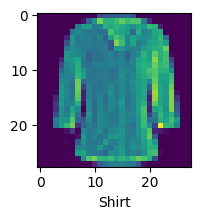

The predicted image label is: Shirt


In [101]:
act_to_pred(4)

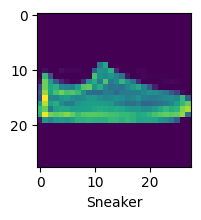

The predicted image label is: Sandal


In [98]:
act_to_pred(12)

In [93]:
cnt = 1
for val in range(0, len(y_pred)):
    if y_class[val] != y_test[val]:
        print(f'The image is {classes[y_test[val]]} with the probability {y_pred[val][y_test[val]]}')
        print(f'Model predicted as {classes[y_class[val]]} with the probability {y_pred[val][y_class[val]]}')
        print()
        cnt += 1
    if cnt > 5:
        break

The image is Sneaker with the probability 0.15708044171333313
Model predicted as Sandal with the probability 0.8194571137428284

The image is Coat with the probability 0.36582863330841064
Model predicted as Pullover with the probability 0.632709801197052

The image is Coat with the probability 0.01115448772907257
Model predicted as Shirt with the probability 0.9888418912887573

The image is Ankle boot with the probability 1.637953146596885e-13
Model predicted as Sandal with the probability 1.0

The image is Shirt with the probability 0.01842034049332142
Model predicted as T-shirt/top with the probability 0.981571614742279

